<a href="https://colab.research.google.com/github/arkaseth/Math-and-stat-for-ML/blob/main/DataNormalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Z-score

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
## create data

data = np.random.poisson(3, 1000) ** 2

In [3]:
# compute mean and std dev
datamean = np.mean(data)
datastd = np.std(data, ddof=1)

In [4]:
# data.mean()
# data.std(ddof=1)

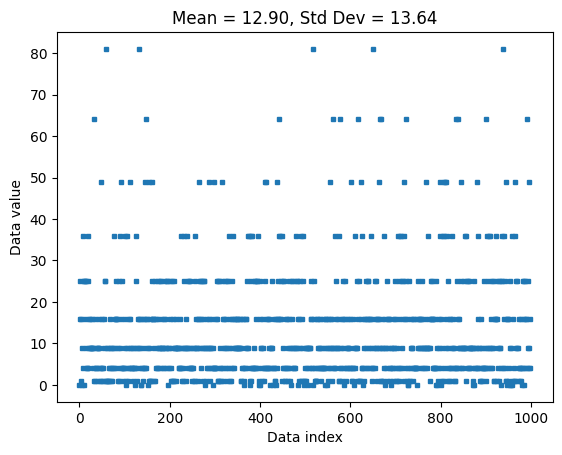

In [5]:
plt.plot(data, 's', markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f"Mean = {datamean:.2f}, Std Dev = {datastd:.2f}")
plt.show()

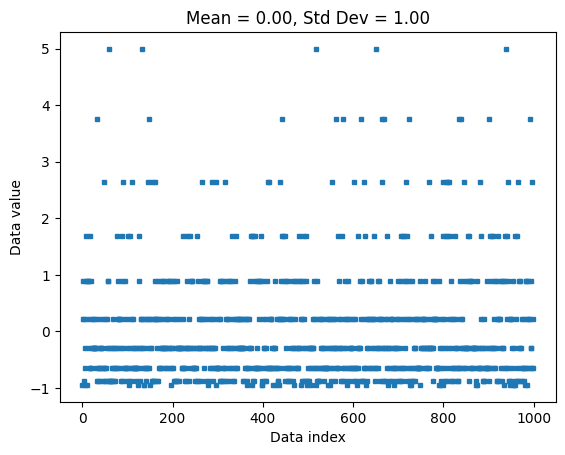

In [6]:
# Z-transform the data

zscore = (data - datamean) / datastd

dataz = stats.zscore(data)

dataZmean = np.mean(dataz)
dataZstd = np.std(dataz, ddof=1)

plt.plot(dataz, 's', markersize=3)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.title(f"Mean = {dataZmean:.2f}, Std Dev = {dataZstd:.2f}")

plt.show()

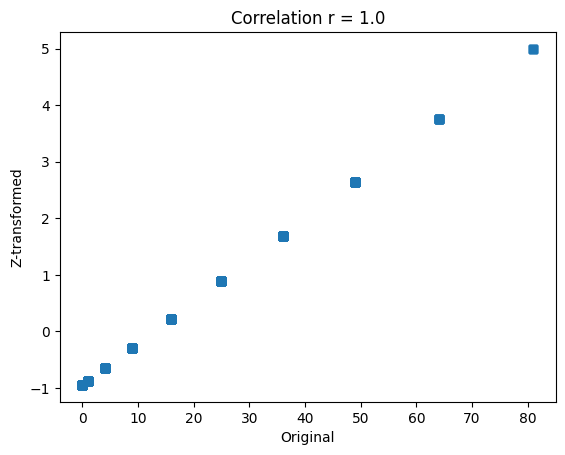

In [7]:
## relative values are preserved -> shape does not change

plt.plot(data, dataz, 's')
plt.xlabel('Original')
plt.ylabel('Z-transformed')
plt.title(f"Correlation r = {np.corrcoef(data,dataz)[0,0]}")
plt.show()

## Min-Max scaling

In [8]:
import matplotlib.pyplot as plt
import numpy as np

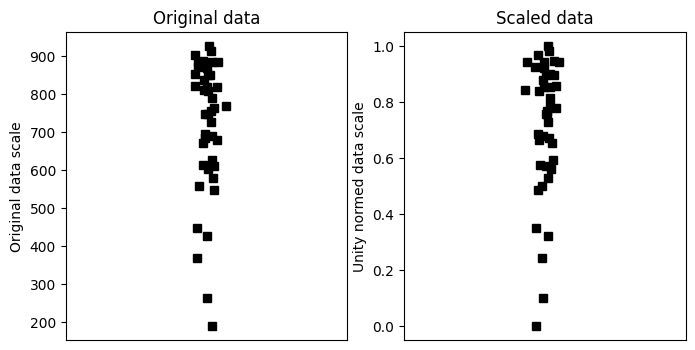

In [9]:
N = 42
data = np.log(np.random.rand(N)) * 234 + 934

dataMin = np.min(data)
dataMax = np.max(data)

dataS = (data-dataMin)/(dataMax-dataMin)

fig,ax = plt.subplots(1,2,figsize=(8,4))
ax[0].plot(1+np.random.randn(N)/20,data,'ks') # x-axis shift
ax[0].set_xlim([0,2])
ax[0].set_xticks([])
ax[0].set_ylabel('Original data scale')
ax[0].set_title('Original data')

ax[1].plot(1+np.random.randn(N)/20,dataS,'ks')
ax[1].set_xlim([0,2])
ax[1].set_xticks([])
ax[1].set_ylabel('Unity normed data scale')
ax[1].set_title('Scaled data')

plt.show()

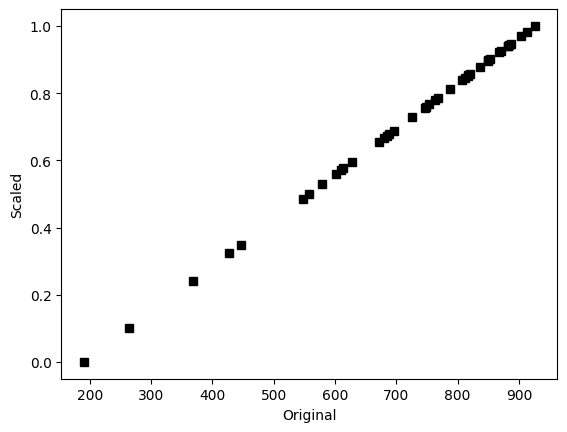

In [10]:
# scaling does not affect relative values

plt.plot(data, dataS, 'ks')
plt.ylabel('Scaled')
plt.xlabel('Original')

plt.show()

In [11]:
## scaling data to arbitrary range

# step 1: normalize to [0,1] as above

# step 2:
newMin = 4
newMax = 8.7

dataSS = dataS * (newMax-newMin) + newMin

print([min(dataSS), max(dataSS)])

[np.float64(4.0), np.float64(8.7)]


## Assignment: Invert min-max scaling

In [12]:
recoveredData = dataMin + ((dataMax-dataMin)*(dataSS-newMin)/(newMax-newMin))

print(np.stack([recoveredData[:5], data[:5]]))

[[871.29657086 817.36215016 613.92897018 688.59432212 883.74706182]
 [871.29657086 817.36215016 613.92897018 688.59432212 883.74706182]]


## Z-score for outlier removal

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from statsmodels import robust

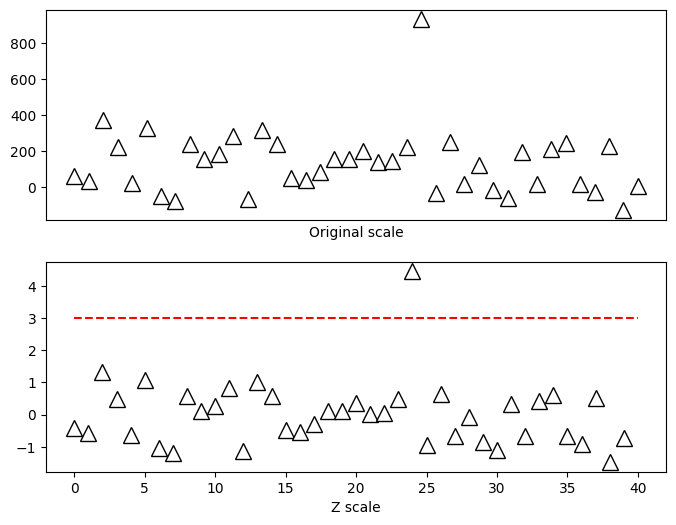

In [14]:
## create data

N = 40
data = np.random.randn(N)

# add outliers
data[data<-1] = data[data<-1] + 2
data[data>2] = data[data>2]**2

data = data*200+50 # change scale

dataZ = stats.zscore(data)

zscorethresh = 3

fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(dataZ, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_xlabel('Z scale')

plt.show()

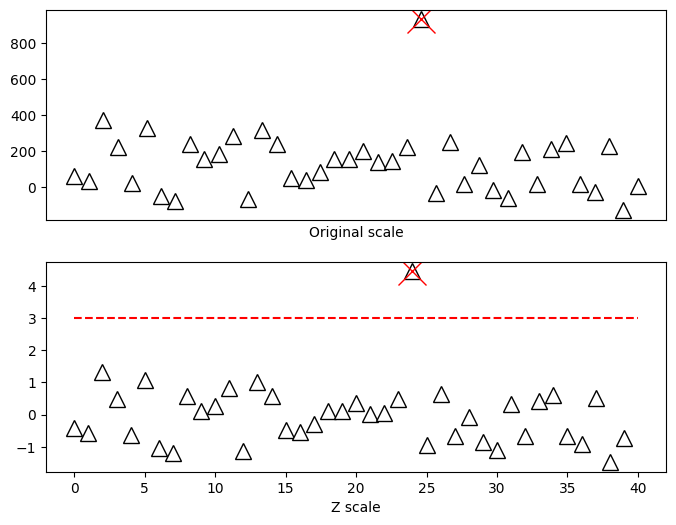

In [15]:
## identify outliers

outliers = np.where(np.abs(dataZ)>zscorethresh)[0]

# cross them out
ax[0].plot(outliers, data[outliers], 'x', color='r', markersize=20)
ax[1].plot(outliers, dataZ[outliers], 'x', color='r', markersize=20)

fig

In [16]:
## two options:

# 1. Replace data with NaN - preserves shape
# 2. Remove from dataset - changes shape

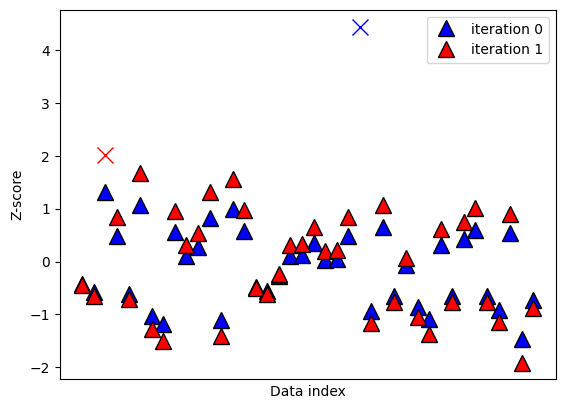

[ 2 24]


In [17]:
## iterative method

zscorethresh = 2 # too lenient in practice
dataZ = (data - np.mean(data)) / np.std(data)

colorz = 'brkm'
numiters = 0

while True:

  # convert to z
  datamean = np.nanmean(dataZ)
  datastd = np.nanstd(dataZ)
  dataZ = (dataZ - datamean) / datastd

  # find data values to remove
  toremove = dataZ > zscorethresh

  if sum(toremove) == 0:
    break

  plt.plot(np.where(toremove)[0], dataZ[toremove], '%sx'%colorz[numiters], markersize=12)
  dataZ[toremove] = np.nan

  plt.plot(dataZ, 'k^', markersize=12, markerfacecolor=colorz[numiters], label=f'iteration {numiters}')
  numiters = numiters + 1

plt.xticks([])
plt.ylabel('Z-score')
plt.xlabel('Data index')
plt.legend()
plt.show()


removeFromOriginal = np.where(np.isnan(dataZ))[0]
print(removeFromOriginal)

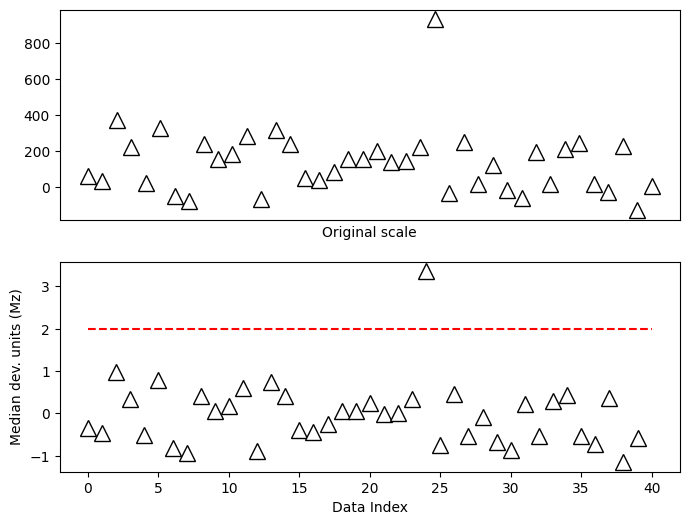

In [18]:
## modified Z for non-normal distributions

dataMed = np.median(data)
dataMad = robust.mad(data)

dataMz = 0.6745 * (data - dataMed) / dataMad
# dataMz = stats.norm.ppf(.75) * (data - dataMed) / dataMad

fig,ax = plt.subplots(2,1,figsize=(8,6))

ax[0].plot(data, 'k^', markerfacecolor='w', markersize=12)
ax[0].set_xticks([])
ax[0].set_xlabel('Data Index')
ax[0].set_xlabel('Original scale')

ax[1].plot(dataMz, 'k^', markerfacecolor='w', markersize=12)
ax[1].plot([0, N], [zscorethresh, zscorethresh], 'r--')
ax[1].set_xlabel('Data Index')
ax[1].set_ylabel('Median dev. units (Mz)')

plt.show()

## Data Trimming to remove outliers

In [19]:
import numpy as np
import matplotlib.pyplot as plt

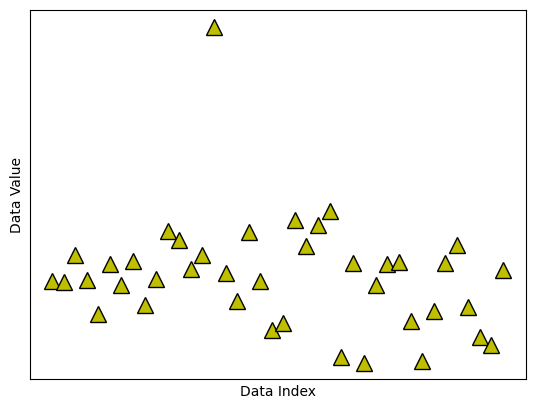

In [20]:
N = 40

data = np.random.randn(N, 1)
data[data<-2] = -data[data<-2]**2
data[data>2] = data[data>2]**2

dataMC = data - np.mean(data)

fig,ax = plt.subplots(1,1)
ax.plot(data, 'k^', label='All data', markerfacecolor='y', markersize=12)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Data Index')
ax.set_ylabel('Data Value')
plt.show()

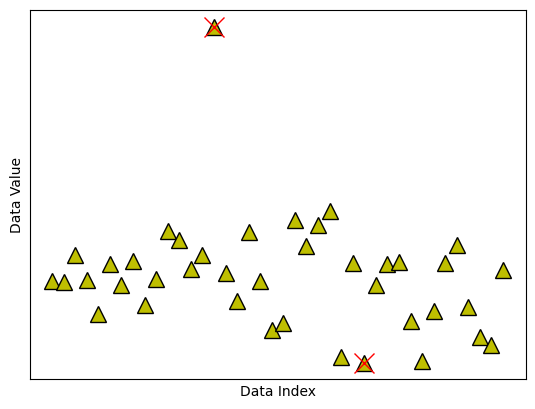

In [21]:
## option 1: remove k% data

trimPct = 5

datacutoff = np.percentile(np.abs(dataMC), 100-trimPct)

data2cut = np.where(np.abs(dataMC) > datacutoff)[0]

ax.plot(data2cut, data[data2cut], 'rx', label=f"{100-trimPct}% threshold", markersize=15)

fig

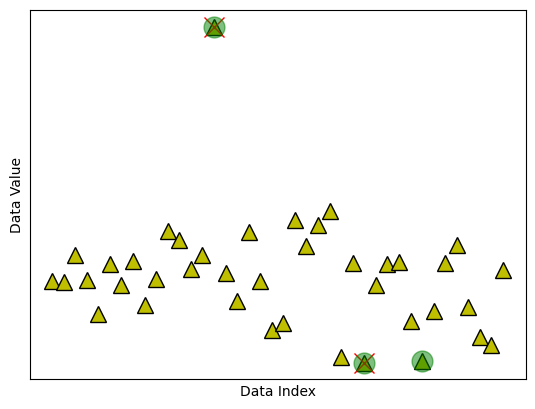

In [22]:
## option 2: remove k most extreme values

k2remove = 3

datasortIdx = np.argsort(np.abs(dataMC), axis=0)[::-1]
data2cut = np.squeeze(datasortIdx[:k2remove])

ax.plot(data2cut, data[data2cut], 'go', label=f"{k2remove}-value threshold", markersize=15, alpha=.5)

fig

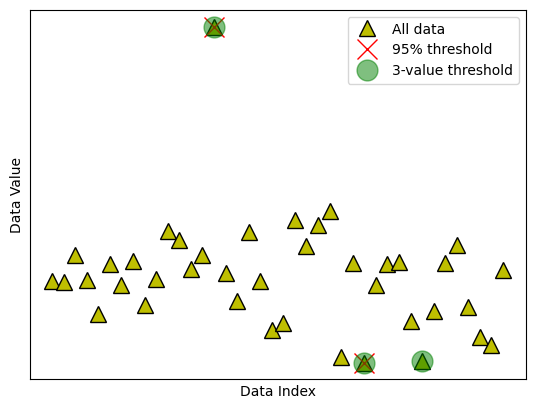

In [23]:
ax.legend()
fig

## Sampling Variability

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

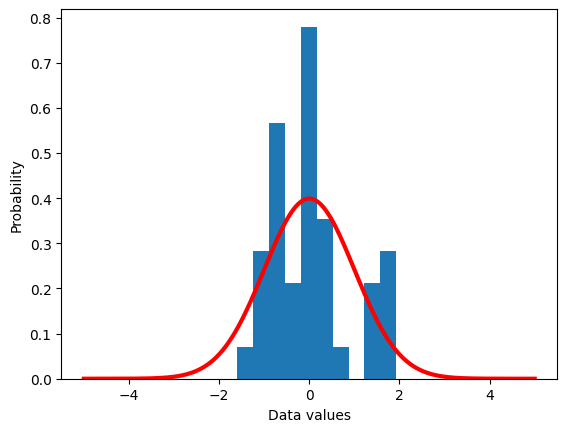

In [26]:
## theoretical normal
x = np.linspace(-5,5,10101)
theoNormDist = stats.norm.pdf(x)
# normalize to pdf:
# theoNormDist = theoNormDist*np.mean(np.diff(x))

numSamples = 40

sampleData = np.zeros(numSamples)

for expi in range(numSamples):
  sampleData[expi] = np.random.randn()

# sampleData = np.random.randn(numSamples)

plt.hist(sampleData, density=True)
plt.plot(x, theoNormDist, 'r', linewidth=3)
plt.xlabel('Data values')
plt.ylabel('Probability')
plt.show()

In [27]:
## NOTE: If needed, normalize values of all the distributions to 1,
## so that all data is on the same scale

In [30]:
## show the mean

populationN = 1000000
population = np.random.randn(populationN)
population = population - np.mean(population)

sampleSize = 30

sampleidx = np.random.randint(0, populationN, sampleSize)
samplemean = np.mean(population[sampleidx])

print(samplemean)

-0.0442072885833724


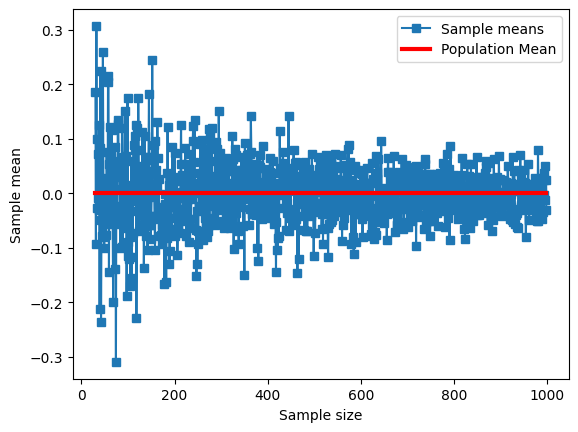

In [38]:
sampleSizes = np.arange(30,1000)

sampleMeans = np.zeros(len(sampleSizes))

for sampi in range(len(sampleSizes)):
  sampleIdx = np.random.randint(0, populationN, sampleSizes[sampi])
  sampleMeans[sampi] = np.mean(population[sampleIdx])

plt.plot(sampleSizes, sampleMeans, 's-')
plt.plot(sampleSizes[[0,-1]], [np.mean(population), np.mean(population)], 'r', linewidth=3)
plt.xlabel('Sample size')
plt.ylabel('Sample mean')
plt.legend(('Sample means', 'Population Mean'))
plt.show()

In [40]:
np.mean(sampleMeans[:500])

np.float64(0.00027287621167814823)